In [19]:
%matplotlib notebook

import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_valid, X_train = X_train[:5000] / 255.0, X_train[5000:] / 255.0
y_valid, y_train = y_train[:5000], y_train[5000:]

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt',
              'Bag', 'Ankle boot']

In [6]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [7]:
class_names[y_train[0]]

'Coat'

In [25]:
# Create a model
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation=keras.layers.ReLU(negative_slope=0.2)))
model.add(keras.layers.Dense(100, activation=keras.layers.ReLU(negative_slope=0.2)))
model.add(keras.layers.Dense(10, activation="softmax"))

In [26]:
X_train.shape

(55000, 28, 28)

In [27]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.layers

In [29]:
784*300 + 300

235500

In [30]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [31]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 2s 37us/sample - loss: 0.7111 - accuracy: 0.7636 - val_loss: 0.5024 - val_accuracy: 0.8360
Epoch 2/30
55000/55000 [==============================] - 2s 35us/sample - loss: 0.4915 - accuracy: 0.8273 - val_loss: 0.4603 - val_accuracy: 0.8402
Epoch 3/30
55000/55000 [==============================] - 2s 36us/sample - loss: 0.4496 - accuracy: 0.8412 - val_loss: 0.4329 - val_accuracy: 0.8526
Epoch 4/30
55000/55000 [==============================] - 2s 36us/sample - loss: 0.4255 - accuracy: 0.8510 - val_loss: 0.4217 - val_accuracy: 0.8574
Epoch 5/30
55000/55000 [==============================] - 2s 34us/sample - loss: 0.4065 - accuracy: 0.8577 - val_loss: 0.4025 - val_accuracy: 0.8638
Epoch 6/30
55000/55000 [==============================] - 2s 34us/sample - loss: 0.3899 - accuracy: 0.8617 - val_loss: 0.3882 - val_accuracy: 0.8662
Epoch 7/30
55000/55000 [==============================] -

In [32]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.711097,0.763600,0.502436,0.8360
1,0.491467,0.827345,0.460275,0.8402
2,0.449590,0.841218,0.432928,0.8526
3,0.425484,0.851018,0.421726,0.8574
4,0.406462,0.857745,0.402468,0.8638


<IPython.core.display.Javascript object>


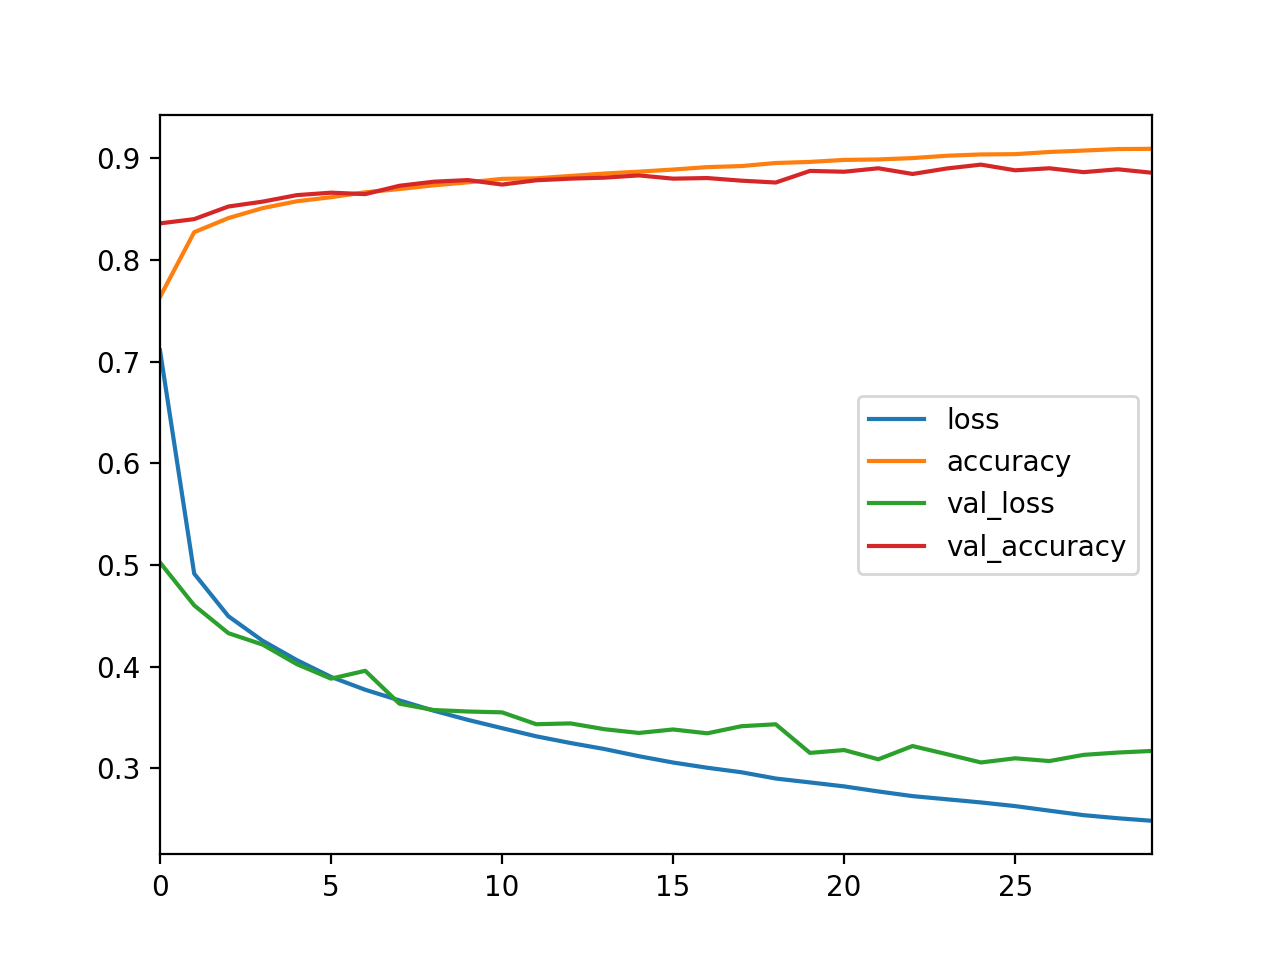

In [33]:
history_df.plot()
plt.show()

In [34]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 23us/sample - loss: 73.3366 - accuracy: 0.8301


[73.33655176849365, 0.8301]